# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ['NEPTUNE_API_TOKEN']="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI5NDc0ZmNhNi0wODFlLTRhYTktYjgwZS01MWJkMDMxNWJhNTAifQ=="
os.environ['NEPTUNE_PROJECT']="guilhermemg/icao-nets-training-2"
os.environ['NEPTUNE_NOTEBOOK_ID']="98a391a1-c710-40bd-aaf4-42c31862cbbe"
os.environ['NEPTUNE_NOTEBOOK_PATH']="training/exec_nas_experiment.ipynb"

In [3]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '..' not in sys.path:
    sys.path.insert(0, '..')

In [4]:
from src.m_utils import constants as cts
from src.base.data_loaders.data_loader import DLName
from src.base.gt_loaders.gt_names import GTName
from src.exp_runner import ExperimentRunner

from src.base.experiment.dataset.dataset import Dataset
from src.base.experiment.evaluation.model_evaluator import DataSource, DataPredSelection
from src.base.experiment.training.base_models import BaseModel
from src.base.experiment.training.optimizers import Optimizer

from src.m_utils.mtl_approach import MTLApproach
from src.m_utils.nas_mtl_approach import NAS_MTLApproach

 ==> Restrict GPU memory growth: True


# Start Network runner

In [ ]:
DATASET = Dataset.MNIST
APPROACH = NAS_MTLApproach.APPROACH_2

kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'neural_arch_search',
        'description': 'NAS with Approach 2 Fixed',
        'tags': ['nas_approach_2_fixed', 'benchmark', f'{DATASET.value["name"]}', 'controller_use_predictor'],
        'src_files': ["../src/**/*.py"]
    },
    'properties': {
        'approach': APPROACH,
        'benchmarking': {
            'use_benchmark_data': False,
            'dataset': DATASET
        },
        'icao_data': {
            'icao_gt': {
                'use_gt_data': True,
                'gt_names': {
                    'train_validation': [],
                    'test': [],
                    'train_validation_test': [GTName.FVC]
                },
            },
            'icao_dl': {
                'use_dl_data': False,
                'tagger_model': None
            },
            'reqs': Dataset.FVC_ICAO.value['tasks'],
            'aligned': False
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'exec_nas': True,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'nas_params': {
        #'max_blocks_per_branch': 5,
        #'n_child_epochs': N_CHILD_EPOCHS,
        #'controller_epochs': CONTROLLER_EPOCHS,
        #'controller_batch_size': 64,
        #'n_trials': N_TRIALS,

        'controller_sampling_epochs': 2,
        'samples_per_controller_epochs': 3,
        'controller_training_epochs': 5,
        'architecture_training_epochs': 2,
        'controller_loss_alpha': 0.9
    },
    'controller_params': {
        'controller_lstm_dim': 100,
        'controller_optimizer': Optimizer.ADAM,
        'controller_learning_rate': 0.01,
        'controller_decay': 0.1,
        'controller_momentum': 0.0,
        'controller_use_predictor': True
    },
    'mlp_params': {
        'max_architecture_length': 5,
        'min_task_group_size': 3,
        'mlp_base_model': BaseModel.MOBILENET_V2,
        'mlp_n_epochs': 50,
        'mlp_batch_size': 64,
        'mlp_early_stopping': 50,
        'mlp_optimizer': Optimizer.ADAMAX,
        'mlp_learning_rate': 1e-3,
        'mlp_decay': 0.0,
        'mlp_momentum': 0.0,
        'mlp_dropout': 0.3,
        'mlp_loss_function': 'sparse_categorical_crossentropy',
        'mlp_one_shot': False
    }
}


runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 257557
Process ID: 270923
---------------------------
-----
Use Neptune:  True
-----
-------------------
Args: 
{'controller_params': {'controller_decay': 0.1,
                       'controller_learning_rate': 0.01,
                       'controller_lstm_dim': 100,
                       'controller_momentum': 0.0,
                       'controller_optimizer': <Optimizer.ADAM: 'Adam'>,
                       'controller_use_predictor': True},
 'exp_params': {'description': 'NAS with Approach 2 Fixed',
                'name': 'neural_arch_search',
                'src_files': ['../src/**/*.py'],
                'tags': ['nas_approach_2_fixed',
                         'benchmark',
                         'mnist',
                         'controller_use_predictor']},
 'mlp_params': {'max_architecture_length': 5,
                'min_task_group_size': 3,
                'mlp_

# Load Data

In [6]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
TrainData.shape: (40000, 12)
ValidationData.shape: (10000, 12)
TestData.shape: (10000, 12)
Data loaded


In [7]:
runner.train_data.head()

,img_name,id,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,/home/guilherme/data1/Dropbox/Link to Desktop/...,b'train_01680',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,/home/guilherme/data1/Dropbox/Link to Desktop/...,b'train_17307',0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,/home/guilherme/data1/Dropbox/Link to Desktop/...,b'train_16399',0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,/home/guilherme/data1/Dropbox/Link to Desktop/...,b'train_27051',0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,/home/guilherme/data1/Dropbox/Link to Desktop/...,b'train_19135',0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Data Generators

In [8]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 40000 validated image filenames.
Found 10000 validated image filenames.
Found 10000 validated image filenames.
TOTAL: 60000

Logging class indices
 .. MTL model not logging class indices!

Using benchmarking dataset. Not logging class labels!


# Setup Experiment

In [9]:
runner.setup_experiment()

-------------------- create experiment -------------------
Setting up neptune experiment
Neptune experiment setup done!


# Labels Distribution

In [10]:
%%capture
runner.summary_labels_dist()

# Neural Architecture Search

In [11]:
best_archs_list = runner.run_neural_architecture_search_v2()

-------------------- run neural architecture search -------------------
----
Checking model existence locally...
Training a new model! Not checking model existence
----
------------------------------
Checking GPU availability
 ..GPU is available!
------------------------------
------------------------------------------------------------------
                       CONTROLLER EPOCH: 0
------------------------------------------------------------------
GENERATING ARCHITECTURE SAMPLES...
------------------------------------------------------
Sequence: [1, 1, 6, 6, 20]
 .Decoded seq: {'n_denses_0': 1, 'n_denses_1': 2, 'n_denses_3': 5}
 ..invalid sequence: less than 4 task groups!
Sequence: [9, 7, 11, 7, 20]
 .Decoded seq: {'n_denses_0': 3, 'n_denses_2': 2, 'n_denses_3': 5}
 ..invalid sequence: less than 4 task groups!
Sequence: [2, 8, 18, 14, 20]
 .Decoded seq: {'n_denses_1': 4, 'n_denses_3': 5}
 ..invalid sequence: less than 4 task groups!
Sequence: [14, 2, 9, 10, 20]
 .Decoded seq: {'n_d

/home/guilherme/data2/anaconda3/envs/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss did not improve from 0.59050
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
157/157 [==============================] - 10s 61ms/step
Prediction finished!
  Task  0: airplane        | EER_mean: 0.12880 | EER_interp: 0.12870 | ACC: 0.87120
  Task  1: automobile      | EER_mean: 0.05830 | EER_interp: 0.05850 | ACC: 0.94170
  Task  2: bird            | EER_mean: 0.13480 | EER_interp: 0.13480 | ACC: 0.86520
  Task  3: cat             | EER_mean: 0.22360 | EER_interp: 0.22380 | ACC: 0.77640
  Task  4: deer            | EER_mean: 0.12330 | EER_interp: 0.12300 | ACC: 0.87680
  Task  5: dog             | EER_mean: 0.14260 | EER_interp: 0.14260 | ACC: 0.85740
  Task  6: frog            | EER_mean: 0.23940 | EER_interp: 0.23920 | ACC: 0.76060
  Task  7: horse           | EER_mean: 0.08530 | EER_interp: 0.08520 | ACC: 0.91480
  Task  8: ship            | EER_mean: 0.09290 | EER_interp: 0.09280 | ACC: 0.90710
  Task  9: truck     

# Create Model with Best Architecture Found

In [12]:
#best_arch = {'n_denses_0':2,'n_denses_1':2,'n_denses_2':2,'n_denses_3':2}
best_arch = best_archs_list[0]['Decoded architecture']

In [13]:
runner.create_model(best_arch)

-------------------- create model -------------------
Creating model...
Model created


# Visualize Model

In [14]:
%%capture
runner.visualize_model(outfile_path=f"figs/nas/nas_model_{APPROACH.name}.png")

In [15]:
%%capture
runner.model_summary()

# Training Model

In [16]:
runner.train_model()

-------------------- train model -------------------
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,191,444
  .. Trainable params: 933,460
  .. Non-trainable params: 2,257,984
Epoch 1/50
625/625 [==============================] - 188s 293ms/step - loss: 0.0987 - airplane_loss: 0.0919 - automobile_loss: 0.0587 - bird_loss: 0.1212 - cat_loss: 0.1544 - deer_loss: 0.1140 - dog_loss: 0.1300 - frog_loss: 0.0879 - horse_loss: 0.0928 - ship_loss: 0.0673 - truck_loss: 0.0692 - airplane_accuracy: 0.9643 - automobile_accuracy: 0.9773 - bird_accuracy: 0.9544 - cat_accuracy: 0.9368 - deer_accuracy: 0.9555 - dog_accuracy: 0.9490 - frog_accuracy: 0.9655 - horse_accuracy: 0.9641 - ship_accuracy: 0.9743 - truck_accuracy: 0.9736 - val_loss: 0.4797 - val_airplane_loss: 0.3559 - val_automobile_loss: 0.2428 - val_bird_loss: 0.3274 - val_cat_loss: 0.3991 - val_deer_loss: 0.2561 - val_dog_loss: 0.3093 - val_frog_loss: 0.8015 - val_horse_loss: 0.5538 - val_ship_loss: 0.21

/home/guilherme/data2/anaconda3/envs/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/50
625/625 [==============================] - 183s 292ms/step - loss: 0.0458 - airplane_loss: 0.0411 - automobile_loss: 0.0223 - bird_loss: 0.0560 - cat_loss: 0.0873 - deer_loss: 0.0474 - dog_loss: 0.0737 - frog_loss: 0.0390 - horse_loss: 0.0359 - ship_loss: 0.0266 - truck_loss: 0.0288 - airplane_accuracy: 0.9848 - automobile_accuracy: 0.9925 - bird_accuracy: 0.9798 - cat_accuracy: 0.9657 - deer_accuracy: 0.9825 - dog_accuracy: 0.9715 - frog_accuracy: 0.9861 - horse_accuracy: 0.9874 - ship_accuracy: 0.9901 - truck_accuracy: 0.9901 - val_loss: 0.4931 - val_airplane_loss: 0.2073 - val_automobile_loss: 0.4042 - val_bird_loss: 0.2015 - val_cat_loss: 0.3182 - val_deer_loss: 0.6864 - val_dog_loss: 0.3138 - val_frog_loss: 1.3127 - val_horse_loss: 0.5350 - val_ship_loss: 0.3081 - val_truck_loss: 0.6435 - val_airplane_accuracy: 0.9542 - val_automobile_accuracy: 0.9399 - val_bird_accuracy: 0.9456 - val_cat_accuracy: 0.9260 - val_deer_accuracy: 0.9101 - val_dog_accuracy: 0.9350 - val_frog

# Plots

-------------------- draw training history -------------------


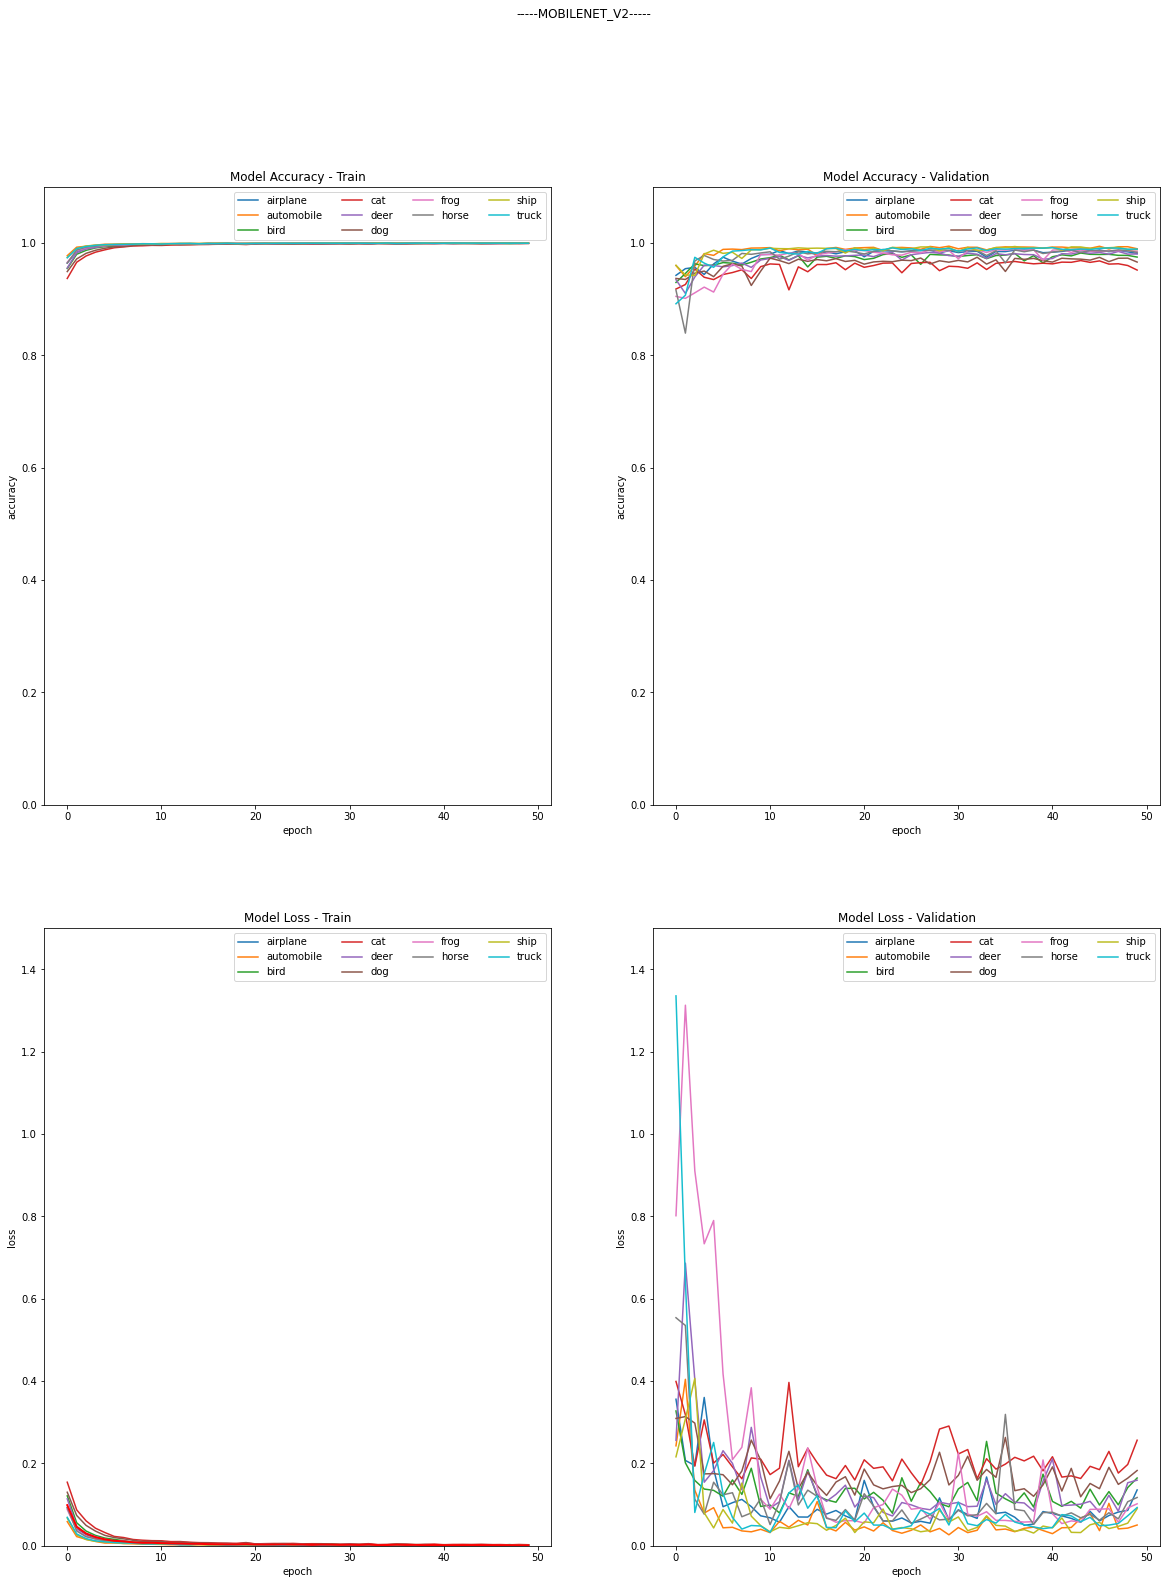

In [17]:
runner.draw_training_history()

# Load Best Model

In [18]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [19]:
runner.save_model()

-------------------- save model -------------------
Saving model


/home/guilherme/data2/anaconda3/envs/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
Saving model to neptune
 ..Uploading file trained_model.zip
Model saved into Neptune
Saving process finished


# Test Trained Model

## Validation Split

In [20]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
157/157 [==============================] - 9s 50ms/step
Prediction finished!
  Task  0: airplane        | EER_mean: 0.02410 | EER_interp: 0.02400 | ACC: 0.97590
  Task  1: automobile      | EER_mean: 0.01390 | EER_interp: 0.01340 | ACC: 0.98620
  Task  2: bird            | EER_mean: 0.05330 | EER_interp: 0.05310 | ACC: 0.94710
  Task  3: cat             | EER_mean: 0.06740 | EER_interp: 0.06740 | ACC: 0.93260
  Task  4: deer            | EER_mean: 0.03980 | EER_interp: 0.03980 | ACC: 0.96030
  Task  5: dog             | EER_mean: 0.05560 | EER_interp: 0.05560 | ACC: 0.94450
  Task  6: frog            | EER_mean: 0.03040 | EER_interp: 0.03040 | ACC: 0.96970
  Task  7: horse           | EER_mean: 0.02810 | EER_interp: 0.02830 | ACC: 0.97150
  Task  8: ship            | EER_mean: 0.01560 | EER_interp: 0.01560 | ACC: 0.98440
  Task  9: truck           | EER_mean: 0.01630 | EER_interp: 0.01600 | ACC: 0.98380
final_EER_mean: 3.44% | final_EER_media

## Test Split

In [21]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
157/157 [==============================] - 9s 56ms/step
Prediction finished!
  Task  0: airplane        | EER_mean: 0.02780 | EER_interp: 0.02790 | ACC: 0.97220
  Task  1: automobile      | EER_mean: 0.01170 | EER_interp: 0.01130 | ACC: 0.98840
  Task  2: bird            | EER_mean: 0.04800 | EER_interp: 0.04800 | ACC: 0.95200
  Task  3: cat             | EER_mean: 0.06900 | EER_interp: 0.06900 | ACC: 0.93100
  Task  4: deer            | EER_mean: 0.04100 | EER_interp: 0.04100 | ACC: 0.95900
  Task  5: dog             | EER_mean: 0.05720 | EER_interp: 0.05710 | ACC: 0.94280
  Task  6: frog            | EER_mean: 0.02890 | EER_interp: 0.02900 | ACC: 0.97110
  Task  7: horse           | EER_mean: 0.02200 | EER_interp: 0.02190 | ACC: 0.97810
  Task  8: ship            | EER_mean: 0.02200 | EER_interp: 0.02200 | ACC: 0.97800
  Task  9: truck           | EER_mean: 0.02100 | EER_interp: 0.02100 | ACC: 0.97910
final_EER_mean: 3.48% | final_EER_media

# Visualize Model Classification

# Finishing Experiment Manager

In [22]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Finishing Neptune
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 41 operations to synchronize with Neptune. Do not kill this process.
All 41 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/guilhermemg/icao-nets-training-2/e/ICAO-398
